Install yfinance Library

In [1]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 50 kB 6.3 MB/s 
     |████████████████████████████████| 112 kB 48.1 MB/s 
     |████████████████████████████████| 110 kB 61.8 MB/s 
     |████████████████████████████████| 62 kB 1.8 MB/s 
     |████████████████████████████████| 128 kB 62.0 MB/s 
     |████████████████████████████████| 4.0 MB 38.3 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


Import Needed Libraries

In [2]:
import numpy as np
import yfinance as yf
import pandas as pd
from scipy.optimize import minimize
from scipy.optimize import Bounds

Select which tickers to use and start date for data pull

In [48]:
tickers = ['JNJ','MSFT','GOOG','AMZN']
Start_date = '2017-01-01'

Pull data and calculate log return

In [49]:
df = yf.download(tickers,start = Start_date )['Adj Close']
ret_df = np.log(df/df.shift(1)) 

[*********************100%***********************]  4 of 4 completed


In [50]:
ret_df.corr()

,AMZN,GOOG,JNJ,MSFT
AMZN,1.000000,0.687231,0.260128,0.710557
GOOG,0.687231,1.000000,0.379526,0.797692
JNJ,0.260128,0.379526,1.000000,0.453691
MSFT,0.710557,0.797692,0.453691,1.000000


Plot cumulative sum of log return

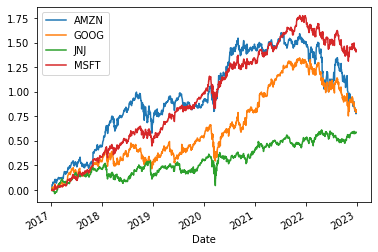

In [51]:
ret_df.cumsum().plot()

Calculate Sharpe Ratio

In [42]:
def Sharpe_Pf(W, returns):
  Portfolio_Return = returns.mean().dot(W)
  Portfolio_Risk = (W.dot(returns.cov()).dot(W))**(0.5)
  Sharpe_Ratio = Portfolio_Return / Portfolio_Risk 
  return -Sharpe_Ratio

Initialize Weights as equal equal weights

In [52]:
W = np.ones(len(ret_df.columns))/np.ones(len(ret_df.columns)).sum()

In [53]:
Sharpe_Pf(W,ret_df)

-0.041082290581065446

Constraints for Minimization function

In [54]:
Cons = ({'type':'eq','fun':lambda x: np.sum(x) - 1})

Compute Optimal Weights for investing

In [55]:
Results = minimize(Sharpe_Pf,W,ret_df,bounds = Bounds(0,1),constraints=Cons)
Optimal_Weights = Results['x']
Optimal_Weights

array([3.81639165e-17, 0.00000000e+00, 2.35996264e-01, 7.64003736e-01])

Calculate Individaul return and risk for individual assets

In [56]:
Idividual_Return = ret_df.mean()
Individual_Risk = ret_df.std()

Split into Test and Train

In [57]:
train = ret_df[:int(len(ret_df)*0.7)]
test = ret_df[int(len(ret_df)*0.7):]

In [58]:
res_train = (minimize(Sharpe_Pf,W,ret_df,bounds = Bounds(0,1),constraints=Cons))


In [59]:
res_train

     fun: -0.05260375855882453
     jac: array([ 1.55934761e-02,  1.46810589e-02,  1.54561363e-04, -4.91142273e-05])
 message: 'Optimization terminated successfully'
    nfev: 51
     nit: 10
    njev: 10
  status: 0
 success: True
       x: array([3.81639165e-17, 0.00000000e+00, 2.35996264e-01, 7.64003736e-01])

In [60]:
test.dot(res_train['x']).cumsum()

Date
2021-03-16    0.010771
2021-03-17    0.007736
2021-03-18   -0.013351
2021-03-19   -0.015211
2021-03-22    0.003947
                ...   
2022-12-22    0.056443
2022-12-23    0.058772
2022-12-27    0.053020
2022-12-28    0.044118
2022-12-29    0.064666
Length: 453, dtype: float64

In [61]:
Sharpe_Pf(res_train['x'],test)

-0.00950256001803911